# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

The Excess Readmission Ratio is calculated as the ratio of predicted readmissions to expected readmissions.

Predicted admissions is the number of 30-day readmission predicted for your hospital on the basis of
your hospital’s performance with its observed case mix and your hospital’s estimated effect on
readmissions. This is presented as a rate per 100 discharges by dividing by the number of
eligible discharges.

Expected readmissions is the number of 30-day readmissions expected for your hospital on the basis
of average hospital performance with your hospital’s case mix and the average hospital effect. 

If a hospital performs better than an average hospital that admitted similar patients, the ratio will be less
than 1.0000. If a hospital performs worse than average, the ratio will be greater than 1.0000.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [121]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats
from scipy.stats import linregress
import scipy.stats as st


In [122]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('cms_hospital_readmissions.csv')

In [123]:
hospital_read_df.head(2)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [140]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


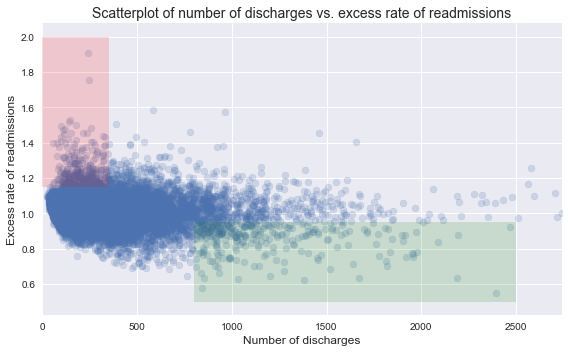

In [141]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

 
   
   ****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

## Do you agree with the preliminary report and recommendations? Why or why not?

**A. Initial observations based on the plot above**
#### Original report
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

#### My comments
First, there are 2 different rates of readmissions: "Predicted" and "Expected". The fact that the report only mentioned "rate of readmissions" can cause misunderstanding. Medical terminology is complicated enough. Let's avoid confusion altogether.

Second, the graph below shows that based on the regression lines, both "Predicted" and "Expected" rate of readmission are trending down with increasing number of discharges. However, the Excess readmission ratio does not seem to trend down with increasing number of discharges.

Third, the report arbitrarily picked two ranges of number of discharges 0-350 and 800-2500 without providing any justifications on how such range was chosen. The argument is flawed initially and thus, no further analyses should be done.


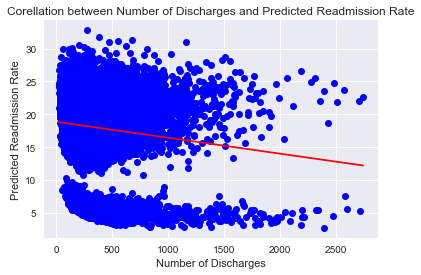

In [142]:
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Predicted Readmission Rate'][81:-3])

gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)

mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.xlabel('Number of Discharges')
plt.ylabel('Predicted Readmission Rate')
plt.title('Corellation between Number of Discharges and Predicted Readmission Rate')
plt.show()

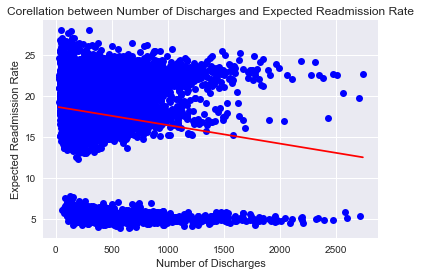

In [143]:
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Expected Readmission Rate'][81:-3])

gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)

mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.xlabel('Number of Discharges')
plt.ylabel('Expected Readmission Rate')
plt.title('Corellation between Number of Discharges and Expected Readmission Rate')
plt.show()

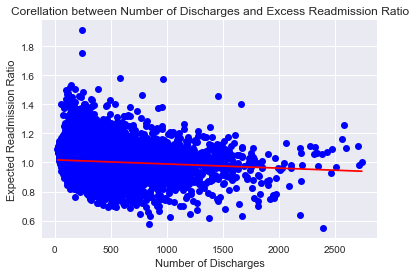

In [144]:
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)

mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.xlabel('Number of Discharges')
plt.ylabel('Expected Readmission Ratio')
plt.title('Corellation between Number of Discharges and Excess Readmission Ratio')
plt.show()

**B. Statistics**

#### Original report
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

#### My analases
The calculations are correct.

In [145]:
df = clean_hospital_read_df
# In hospitals/facilities with number of discharges < 100
excess_small_hospital = df[df['Number of Discharges'] < 100][df['Excess Readmission Ratio'] > 0]['Excess Readmission Ratio'] 
excess_small_hospital_mean =np.mean(excess_small_hospital)
print ("Mean excess readmission ratio when number of discharges < 100 is ", excess_small_hospital_mean)

# Hospitals that have excess readmission ratio > 1 is considered "Bad"
excess_bad_small_hospital = df[df['Number of Discharges'] < 100][df['Excess Readmission Ratio'] > 1]['Excess Readmission Ratio'] 
percent_bad_small_hospital = len(excess_bad_small_hospital)/ len(excess_small_hospital) * 100 # calculate percentage of those who have excess readmission ratio greater than 1
print ("Percentage of those who have excess readmission ratio >1 and number of discharges < 100 is ", percent_bad_small_hospital)
                          


Mean excess readmission ratio when number of discharges < 100 is  1.0226183501683506
Percentage of those who have excess readmission ratio >1 and number of discharges < 100 is  63.215488215488215


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [146]:
# In hospitals/facilities with number of discharges > 1000
excess_large_hospital = df[df['Number of Discharges'] > 1000][df['Excess Readmission Ratio'] > 0]['Excess Readmission Ratio'] 
excess_large_hospital_mean =np.mean(excess_large_hospital)
print ("Mean excess readmission ratio when number of discharges < 1000 is ", excess_1000_mean)

excess_bad_large_hospital = df[df['Number of Discharges'] > 1000][df['Excess Readmission Ratio'] > 1]['Excess Readmission Ratio'] 
percentage_bad_large_hospital = len(excess_bad_large_hospital)/ len(excess_large_hospital) * 100 # calculate percentage of those who have excess readmission ratio greater than 1
print ("Percentage of those who have excess readmission ratio > 1 and number of discharges < 1000 is ", percentage_bad_large_hospital)


# Calculate statistical significance
stats.ttest_ind(excess_large_hospital,excess_bad_large_hospital)


Mean excess readmission ratio when number of discharges < 1000 is  0.9783354211663071
Percentage of those who have excess readmission ratio > 1 and number of discharges < 1000 is  44.49244060475162


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Ttest_indResult(statistic=-11.238415576454267, pvalue=5.8691807499855439e-27)

**C. Conclusions**
####  Original report
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

#### My analyses
The analyses suggested that large hospitals (number of discharge > 1000) have a significant lower average excess readmission ratio (0.978) compared to that of small hospitals (number of discharge < 100).

However, it is incorrect to conlcude that the smaller hospital may be lacking resources to ensure quality care. There are certain medical conditions that have higher readmission rate includes Acute Myocardial Infarction (AMI), Heart Failure and Pneumonia. Thus, facilities that treat patients that have these conditions will probrably has higher readmission rates and excessive readmission ratios and this has little to do with the facility ability to maintain high quality care.

In fact, there are two distinct groups of hospital that have different readmission rate that does not correlate with capacity (number of discharge). Below is my analysis.

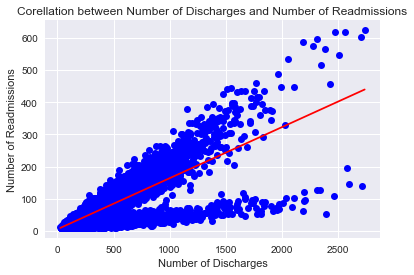

In [147]:
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Number of Readmissions'][81:-3])

gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)

mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.xlabel('Number of Discharges')
plt.ylabel('Number of Readmissions')
plt.title('Corellation between Number of Discharges and Number of Readmissions')
plt.show()

**D. Regulatory policy recommendations**
#### Original report
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

#### My comment
Too far-fetched. The solutions should not be draw on such flawed analyses.

## Statistical analyses

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.


### 1. Hypothesis
** Small hospitals have similar excess readmission ratio compared to large hospital **

### 2. Calculate p-value

In [148]:
excess_small_hospital = df[df['Number of Discharges'] < 100][df['Excess Readmission Ratio'] > 0]['Excess Readmission Ratio'] 
excess_large_hospital = df[df['Number of Discharges'] >1000][df['Excess Readmission Ratio'] > 0]['Excess Readmission Ratio'] 

# Calculate statistical significance
result = stats.ttest_ind(excess_small_hospital,excess_large_hospital)

print ("Statistical significance is: ", result[0])
print ("P-value is: ", result[1])

Statistical significance is:  10.0606203985
P-value is:  3.77875392334e-23


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [149]:
from scipy import stats
discharges = df[df['Number of Discharges'] > 0]['Number of Discharges']
readmission = df[df['Number of Discharges'] > 0]['Excess Readmission Ratio']
pho, p_val = stats.pearsonr(discharges, readmission)

print('correlation coefficient:',pho)
print('p value =',p_val)
check_significance(p_val, alpha=0.01)

correlation coefficient: -0.0973979435108
p value = 1.22254737768e-25
The null hypothesis can be rejected


### 3.Report statistical significance for α  = 0.01
P-value < 0.01
Reject H0

#### 4.Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
Statistical significance shows that excessive readmission ratio of small hospital is signigicantly different from large hospital. However, this difference is not justifiable enough to be practical in the real world because the difference in the mean is 0.05. This statistical study has statistical significance but not practical significance.
I would recommend to the customer that the hospital capacity does not influence excess readmission ratio.


#### 5.Look at the scatterplot above. 
What are the advantages and disadvantages of using this plot to convey information?
+ Advantage: shows outliers and retains exact data values and sample size.
+ Disadvantage: the scatterplot gives inconclusive results because no trendline was shown.

Construct another plot that conveys the same information in a more direct manner.

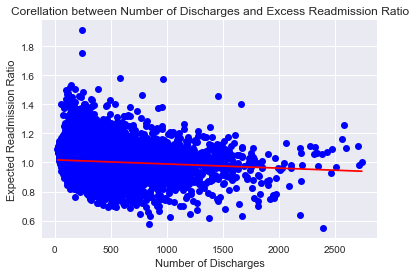

In [151]:
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)

mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.xlabel('Number of Discharges')
plt.ylabel('Expected Readmission Ratio')
plt.title('Corellation between Number of Discharges and Excess Readmission Ratio')
plt.show()